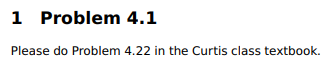
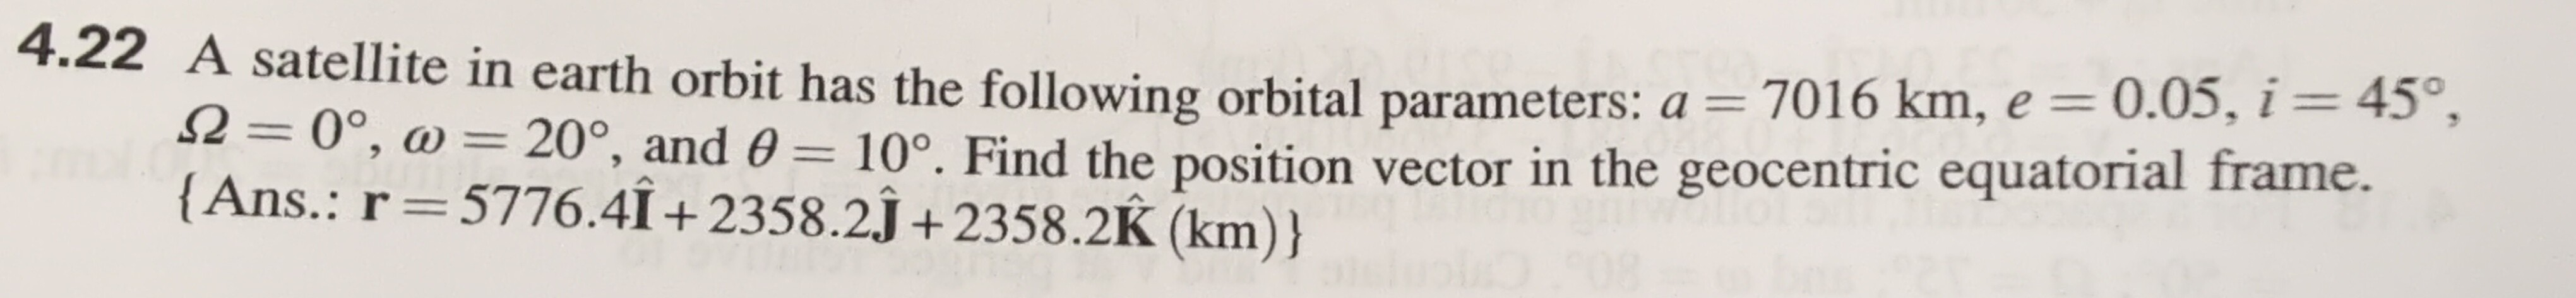

In [30]:
from sympy import *
from sympy.vector import CoordSys3D


e = Symbol('e')
a = Symbol('a')
r_p = Symbol('r_p')
i = Symbol('i')
Ω = Symbol('Ω')
ω = Symbol('ω')
theta = Symbol('theta')
mu = Symbol('mu')
r_earth = Symbol('r_earth')

values = {
    (mu, 3.986*10**5), # in units of km^3/s^2
    (a, 7016),
    (e, 0.05),
    (i, 45),
    (Ω, 0),
    (ω, 20),
    (theta, 10),
}

# rearranging eqs 2.71 and 2.84 to get r_p in terms of a and e
r_p = a*(1-e)

#
# determine angular momentum from orbit equation r = h**2 / mu / (1 + e * cos(theta))

h = sqrt( r_p * mu * (1 + e * cos(theta * pi / 180)))
print('h', h.subs(values).evalf())

#
# position and velocity in perifocal reference frame
#

# PQW = CoordSys3D('PQW')

r_P = r_p*cos(theta * pi / 180)# * PQW.i
r_Q = r_p*sin(theta  * pi / 180)# * PQW.j
r_W = 0# * PQW.k

v_P = -mu/h * sin(theta * pi / 180)# * PQW.i
v_Q = mu/h * ( e + cos(theta * pi / 180))# * PQW.j
v_W = 0# * PQW.k

r_PQW = Matrix( [r_P, r_Q, r_W] )
v_PQW = Matrix( [v_P, v_Q, v_W] )

#
# define Rotation Matrices
#

C_Ω = Matrix (
    [
        [ cos(Ω * pi / 180), sin(Ω * pi / 180), 0],
        [ -sin(Ω * pi / 180), cos(Ω * pi / 180), 0],
        [0,0,1]
    ]
)

A_i = Matrix(
    [
        [1,0,0],
        [0,cos(i*pi/180),sin(i*pi/180)],
        [0,-sin(i*pi/180),cos(i*pi/180)]
    ]
)

C_ω = Matrix (
    [
        [ cos(ω * pi / 180), sin(ω * pi / 180), 0],
        [ -sin(ω * pi / 180), cos(ω * pi / 180), 0],
        [0,0,1]
    ]
)

R = C_ω*A_i*C_Ω

r_ijk = R.transpose()*r_PQW
v_ijk = R.transpose()*v_PQW

print("positions: ",r_ijk.subs(values).evalf())
print("velocities: ",v_ijk.subs(values).evalf())


h 52797.4247180965
positions:  Matrix([[5772.23252130404], [2356.50405898229], [2356.50405898229]])
velocities:  Matrix([[-3.90391127137369], [4.87399531924912], [4.87399531924912]])


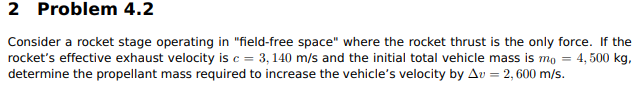

In [1]:
%reset -f
from sympy import *

#symbols

m_0 = Symbol('Rm_0')
Δv_ideal = Symbol('Δv_ideal')
v_exhaust = Symbol('v_exhaust')

# values

values = [
    (v_exhaust, 3140),       # m/s
    (Δv_ideal, 2600),       # m/s
    (m_0, 4500)             # kg
]

# rearranging Δv = -v_exhaust*ln(mv/(mv + mp)) gives:
m_p = m_0*(1-exp(-Δv_ideal/v_exhaust))

print("propellant mass required: ",m_p.subs(values).evalf(),"kg")


propellant mass required:  2533.89993327458 kg


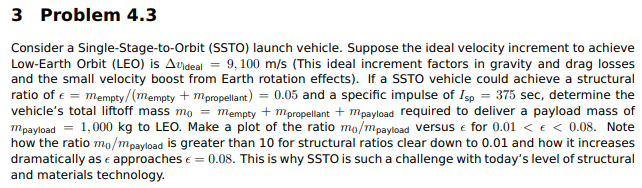

Liftoff mass required:  27716.7433545359 kg


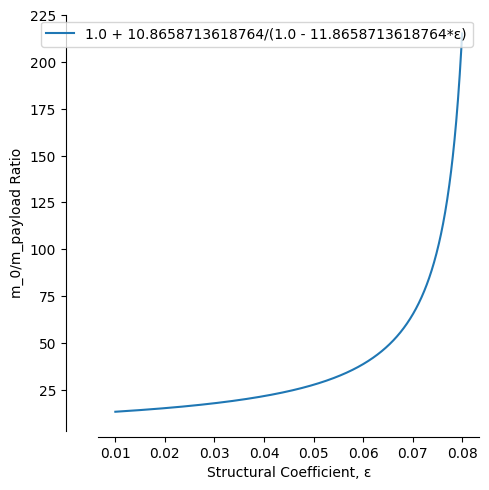

In [32]:
%reset -f
# sympy
import sympy
from sympy import *
import sys

#symbols

ε = Symbol('ε')
λ = Symbol('λ')
R = Symbol('R')
Δv_ideal = Symbol('Δv_ideal')
g_0 = Symbol('g_0')
I_sp = Symbol('I_sp')
m_payl = Symbol('m_payl')
m_stage1 = Symbol('m_stage1') # = mstr + mprop
m_0 = Symbol('m_0')

# values

values = [
    (Δv_ideal, 9100),   # m/s
    (m_payl, 1000),     # kg
    (g_0, 9.81),        # m/s^2
    (I_sp, 375)         # seconds
]

R = exp(Δv_ideal / (g_0 * I_sp))
λ = (1 - ε * R) / (R - 1)

m_stage1 = m_payl / λ

m_0 = m_stage1 + m_payl

ratio = m_0/m_payl

print("Liftoff mass required: ", m_0.subs(values).subs(ε, 0.05).evalf(),"kg")

p = plot(
        ratio.subs(values).evalf(),
        (ε, 0.01, 0.08),
        axis_center = (0,0),
        size = (5,5),
        xlabel = 'Structural Coefficient, ε',
        ylabel = 'm_0/m_payload Ratio',
        legend = True,
        show = False
)

p.show()

# As you can see by this graph, earth is hard :(
# This is why we use two stages. With automation it is a lot 
#   more feasible than it was 50 years ago

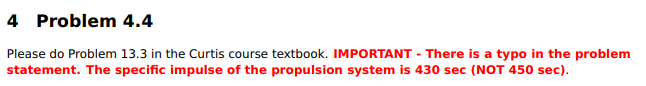
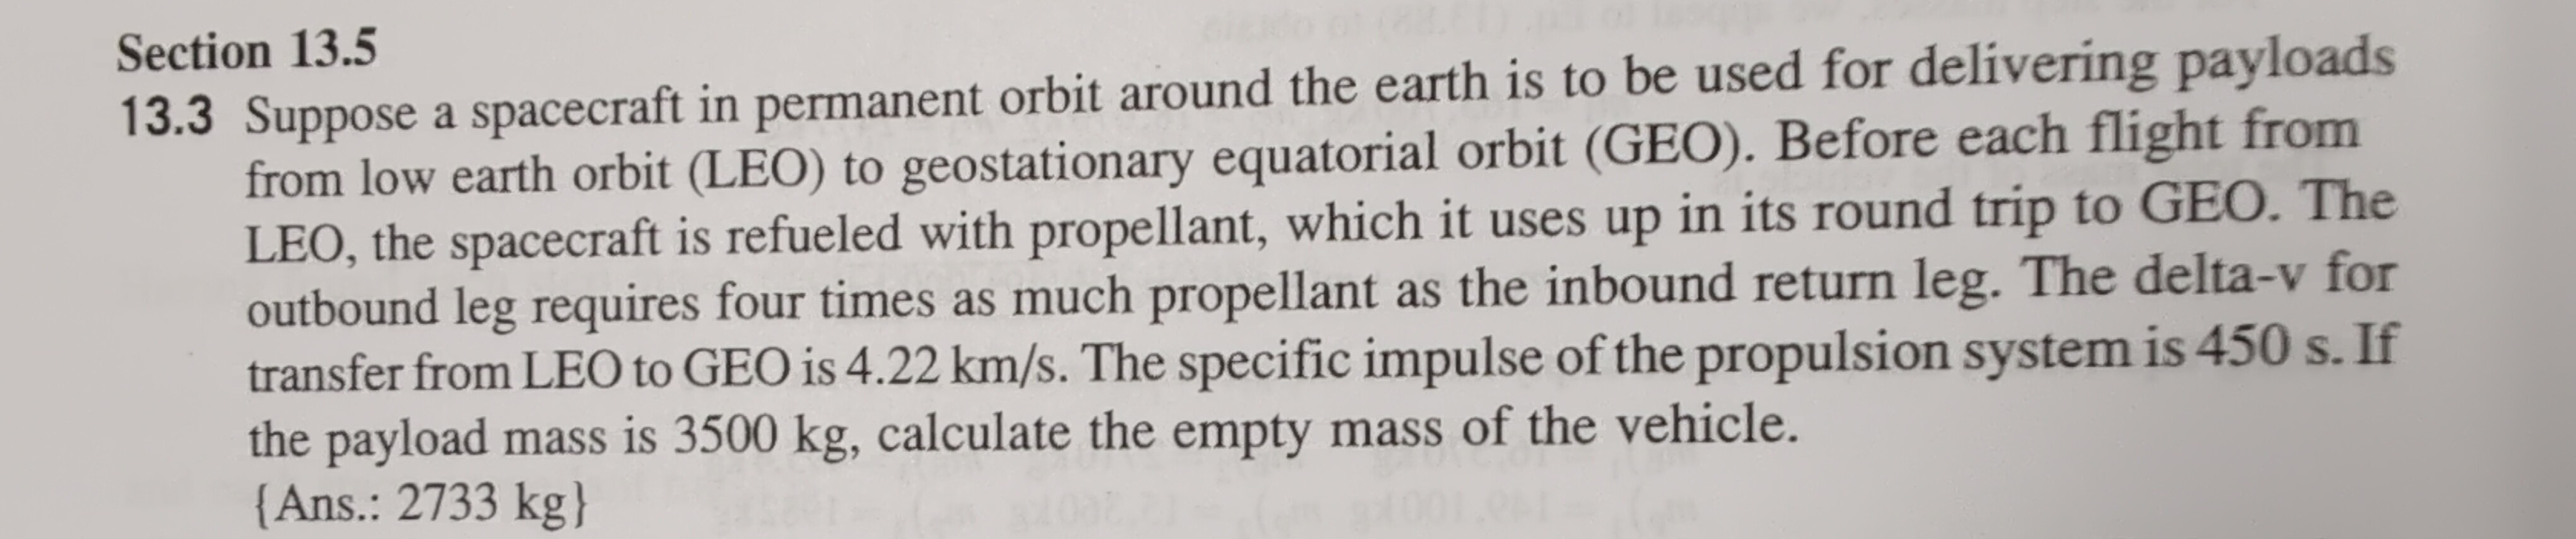

Starting with these two equations:

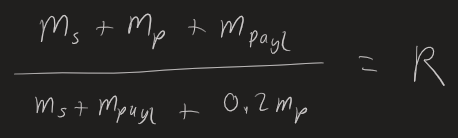
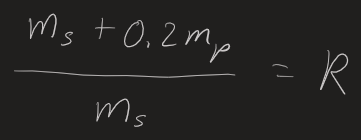

I rearrange to a system of linear equations:

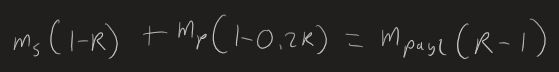
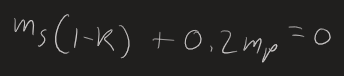

Which I will program (I will replace 0.2 with the ratio variable)

In [ ]:
%reset -f
# sympy
import sympy
from sympy import *
import sys

#symbols

R = Symbol('R')
Δv_ideal = Symbol('Δv_ideal')
g_0 = Symbol('g_0')
I_sp = Symbol('I_sp')
m_payl = Symbol('m_payl')
m_empty = Symbol('m_empty')
m_prop = Symbol('m_prop')
leg1_prop_per_leg2 = Symbol('leg1_prop_per_leg2')

# values

values = [
    (Δv_ideal, 4220),   # m/s
    (m_payl, 3500),     # kg
    (g_0, 9.81),        # m/s^2
    (leg1_prop_per_leg2, 4),       # has no unit! unitless!
    (I_sp, 430)         # seconds
]

leg2_ratio = 1 / (leg1_prop_per_leg2 + 1)

# R = m_0/ m_f
R = exp(Δv_ideal / (g_0 * I_sp))

# From above
eq1 = Eq(m_empty * (1 - R) + m_prop * (1 - leg2_ratio * R),m_payl * (R - 1)) 
eq2 = Eq(m_empty * (1 - R) + m_prop * leg2_ratio,0)  


solution = solve((eq1, eq2), (m_empty,m_prop))
for var,val in solution.items():
    print(f"{var} = {val.subs(values).evalf()}")

m_empty = 2733.04591333112
m_prop = 23495.6886999667
